In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import rpy2.robjects as ro
from functools import partial
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
from rpy2.ipython import html
html.html_rdataframe = partial(html.html_rdataframe, table_class = "docutils")
%load_ext rpy2.ipython

In [2]:
%%R
library(mlbench)
datasetxor <- mlbench.xor(1000)
XR_datasetxor <- datasetxor$x
LABELSR_datasetxor<- datasetxor$classes

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [3]:
from rpy2.robjects import numpy2ri
numpy2ri.activate()
x_df_xor = np.array(ro.r['XR_datasetxor'])
labels_df_xor = np.array(ro.r['LABELSR_datasetxor'])
labels_df_xor[labels_df_xor == 1] = -1
labels_df_xor[labels_df_xor == 2] = 1

In [4]:
import Train_And_Grid_CV

In [5]:
p = 15
lam = np.arange(start = 0, stop = 5, step = 0.01)
CV_groups = 10
lam_val, max_acc = Train_And_Grid_CV.grid_search_lam(x_df_xor, labels_df_xor, p, lam, CV_groups)

The model with best accuracy has the accuracy : 0.99
The model parameters with best accuracy has the lambda : 0.33


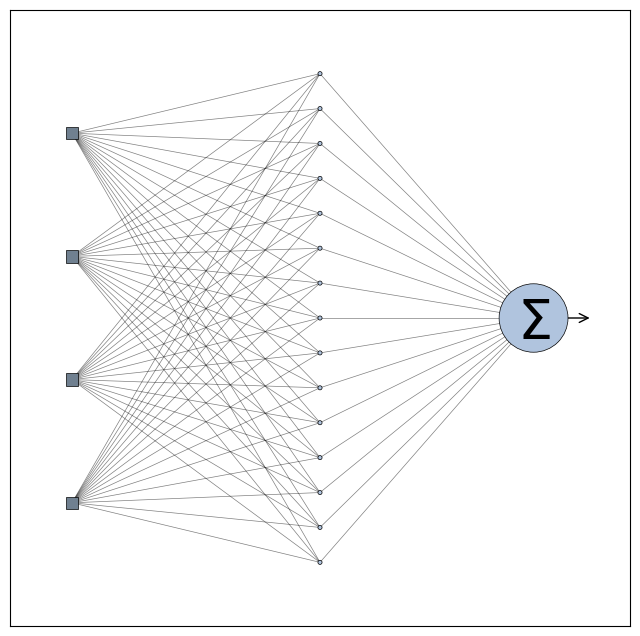

In [6]:
import plot_neural_network
plot_neural_network.plot_nn(n_members = p)